<a href="https://colab.research.google.com/github/Shymori/regression_dataset_models/blob/main/Projeto_Regressao_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Modelo de Regressão

## 1.1 Apresentação
Temos um dataset de imoveis e temos como objetivos utilizá-lo para que possa ajudar na predição do valor dos imóveis.


## 1.2 Carregando os dados

[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)


In [241]:
import pandas as pd
import numpy as np

In [242]:
dados = pd.read_json(
    path_or_buf='/content/imoveis.json',
    orient='colums'
)
dados

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


### Explorar as informações

In [243]:
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [244]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## 1.3 Tratamento de dados inicial

### Normalização
Transformar o json em dataframe

In [245]:
dados_lista1 = pd.json_normalize(dados.ident)
dados_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [246]:
dados_lista2 = pd.json_normalize(dados.listing,sep='_')
dados_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


### Junção dos dataframes

In [247]:
dados_imoveis = pd.concat([dados_lista1,dados_lista2],axis=1)
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [248]:
dados_imoveis.shape

(73615, 21)

In [249]:
for coluna in dados_imoveis.columns:
  print('======'*30)
  print(dados_imoveis[coluna].value_counts())

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

## 1.4 Limpeza

### Filtro

In [250]:
filtro = (dados_imoveis['types_usage']=='Residencial') & (dados_imoveis['address_city']=='Rio de Janeiro')
dados_imoveis = dados_imoveis[filtro]
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


### Tipos de variáveis

In [251]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

Verificando a saída do `.info`

> 69588 entries, 0 to 73614

 percebemos que temos que resentar o index, para que as infos fiquem ordenadas corretamente.


In [252]:
dados_imoveis.reset_index(drop=True,inplace=True)

In [253]:
dados_imoveis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Agora está correto.

In [254]:
dados_imoveis = dados_imoveis.astype({
    'prices_price' : 'float64',
    'prices_tax_iptu' : 'float64',
    'prices_tax_condo' : 'float64',
    'features_usableAreas' : 'int64',
    'features_totalAreas' : 'int64'
})

dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## 1.5 - Tratamento de dados final

### Lidando com dados nulos

#### Dados nulos zone

In [255]:
dados_imoveis.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

Transformar valores vazios em Nan



In [256]:
dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('',np.nan)

In [257]:
dados_imoveis.address_zone.isna().sum()

149

In [258]:
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


Utilizar os bairros pra preencher as zonas faltantes (Nan)


In [259]:
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
dici
#~dados_imoveis['address_zone'].isna() = diferente de isna()
#drop_duplicates = remove as duplicatas de neighborhood, pois no dicionário não precisamos dois dados com mesmo nome

[{'customerID': '775564-BOJSMVON',
  'source': 'Website',
  'types_unit': 'Outros',
  'types_usage': 'Residencial',
  'address_city': 'Rio de Janeiro',
  'address_location_lon': -43.413557,
  'address_location_lat': -22.909429,
  'address_zone': 'Zona Oeste',
  'address_neighborhood': 'Taquara',
  'prices_price': 45000.0,
  'prices_tax_iptu': 0.0,
  'prices_tax_condo': 150.0,
  'features_bedrooms': 0,
  'features_bathrooms': 0,
  'features_suites': 0,
  'features_parkingSpaces': 1,
  'features_usableAreas': 62,
  'features_totalAreas': 62,
  'features_floors': 0,
  'features_unitsOnTheFloor': 0,
  'features_unitFloor': 0},
 {'customerID': '660895-AUENKNYY',
  'source': 'Website',
  'types_unit': 'Apartamento',
  'types_usage': 'Residencial',
  'address_city': 'Rio de Janeiro',
  'address_location_lon': -43.509141,
  'address_location_lat': -22.869698,
  'address_zone': 'Zona Oeste',
  'address_neighborhood': 'Santíssimo',
  'prices_price': 45000.0,
  'prices_tax_iptu': 0.0,
  'prices_t

In [260]:
dic_zonas = {dic['address_neighborhood']:dic['address_zone'] for dic in dici}
dic_zonas

{'Taquara': 'Zona Oeste',
 'Santíssimo': 'Zona Oeste',
 'Pedra de Guaratiba': 'Zona Oeste',
 'Recreio dos Bandeirantes': 'Zona Oeste',
 'Guaratiba': 'Zona Oeste',
 'Jacarezinho': 'Zona Norte',
 'Santa Cruz': 'Zona Oeste',
 'Vargem Grande': 'Zona Oeste',
 'Bangu': 'Zona Oeste',
 'Tanque': 'Zona Oeste',
 'Santo Cristo': 'Zona Central',
 'Coelho Neto': 'Zona Norte',
 'Bento Ribeiro': 'Zona Norte',
 'Campo Grande': 'Zona Oeste',
 'Oswaldo Cruz': 'Zona Norte',
 'Camorim': 'Zona Oeste',
 'Sepetiba': 'Zona Oeste',
 'Vigário Geral': 'Zona Norte',
 'Campinho': 'Zona Norte',
 'Realengo': 'Zona Oeste',
 'Jacarepaguá': 'Zona Oeste',
 'Cidade de Deus': 'Zona Oeste',
 'Honório Gurgel': 'Zona Norte',
 'Centro': 'Zona Central',
 'Cosmos': 'Zona Oeste',
 'Tomás Coelho': 'Zona Norte',
 'Cascadura': 'Zona Norte',
 'Pavuna': 'Zona Norte',
 'Paciência': 'Zona Oeste',
 'Praça Seca': 'Zona Oeste',
 'Vila Valqueire': 'Zona Oeste',
 'Inhoaíba': 'Zona Oeste',
 'Vicente de Carvalho': 'Zona Norte',
 'Senador Vasc

utilizando neighborhood para preencher zonas Nan

In [261]:
for bairro, zona in dic_zonas.items(): dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

Validando se ainda temos zonas Nan

In [262]:
dados_imoveis['address_zone'].isna().sum()

0

#### Dados nulos prices

In [263]:
dados_imoveis['prices_tax_iptu'].isnull().sum()

8725

In [264]:
dados_imoveis['prices_tax_condo'].isnull().sum()

6061

In [265]:
dados_imoveis['prices_tax_iptu'].fillna(0,inplace=True)
dados_imoveis['prices_tax_iptu'].isnull().sum()

0

In [266]:
dados_imoveis['prices_tax_condo'].fillna(0,inplace=True)
dados_imoveis['prices_tax_condo'].isnull().sum()

0

### Alterar o nome das colunas e seleção de variáveis

In [267]:
dados_imoveis.drop(['customerID','source','types_usage','address_city','address_location_lon','address_location_lat','address_neighborhood'],axis=1,inplace=True)
#axis=1 para deixar claro que é pra remover colunas

In [268]:
dicionario_colunas = {'types_unit': 'unit', 'address_zone' : 'zone', 'prices_price' : 'price', 'prices_tax_condo': 'tax_condo','prices_tax_iptu' : 'tax_iptu','features_bedrooms' : 'bedrooms', 'features_bathrooms' : 'bathrooms','features_suites' : 'suites','features_parkingSpaces' : 'parkingSpaces','features_usableAreas' : 'usableAreas','features_totalAreas' : 'totalAreas','features_floors' : 'floors','features_unitsOnTheFloor' : 'unitsOnTheFloor','features_unitFloor' : 'unitFloor'}
dados_imoveis = dados_imoveis.rename(dicionario_colunas,axis=1)
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


# Aula 2 - Regressão linear

## 2.1 - Correlação

*   Correlação: grau da relação entre variáveis. Pode ser positiva ou negativa essa relação.

*   Multicolinearidade: relação perfeita ou exata entre variáveis.



**Dica de leitura:** [Estatística prática para cientistas de dados: 50 conceitos essenciais](https://www.amazon.com.br/Estat%C3%ADstica-Pr%C3%A1tica-Para-Cientistas-Dados/dp/855080603X/ref=sr_1_21?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=1JJ44C5LJXLR3&keywords=data+science&qid=1657892785&sprefix=data+science%2Caps%2C201&sr=8-21)
e [Estatística: O que é, para que serve e como funciona](https://www.amazon.com.br/Estat%C3%ADstica-para-serve-como-funciona/dp/8537815128/ref=pd_sbs_sccl_3_1/137-9319794-7502061?pd_rd_w=EQoo7&content-id=amzn1.sym.d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_p=d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_r=E896BYW6W206YVVR3SHA&pd_rd_wg=3O0Cg&pd_rd_r=3e3910b0-5f34-4a57-87b2-1d918494d614&pd_rd_i=8537815128&psc=1) [(Naked Statistics: Stripping the Dread from the Data - versão em inglês)](https://www.amazon.com.br/Naked-Statistics-Stripping-Dread-Data/dp/039334777X/ref=sr_1_2?keywords=naked+statistics&qid=1657893464&sprefix=naked+st%2Caps%2C267&sr=8-2&ufe=app_do%3Aamzn1.fos.6a09f7ec-d911-4889-ad70-de8dd83c8a74)

<ipython-input-269-f814c58c5de1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(dados_imoveis.corr())
<ipython-input-269-f814c58c5de1>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(dados_imoveis.corr(),mask=mask, cmap = cores, annot = True, fmt=".3f",linewidths=.6)


<Axes: >

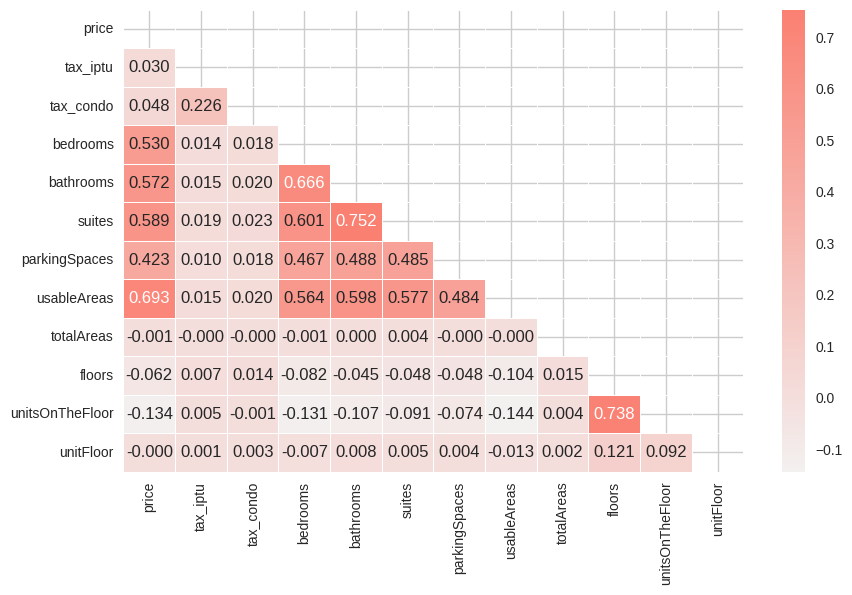

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(dados_imoveis.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 6))
plot = sns.heatmap(dados_imoveis.corr(),mask=mask, cmap = cores, annot = True, fmt=".3f",linewidths=.6)
plot

Para mais detalhes consultar [Documentação Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Análise da distribuição da variável resposta.

Text(0.5, 0, 'Preço')

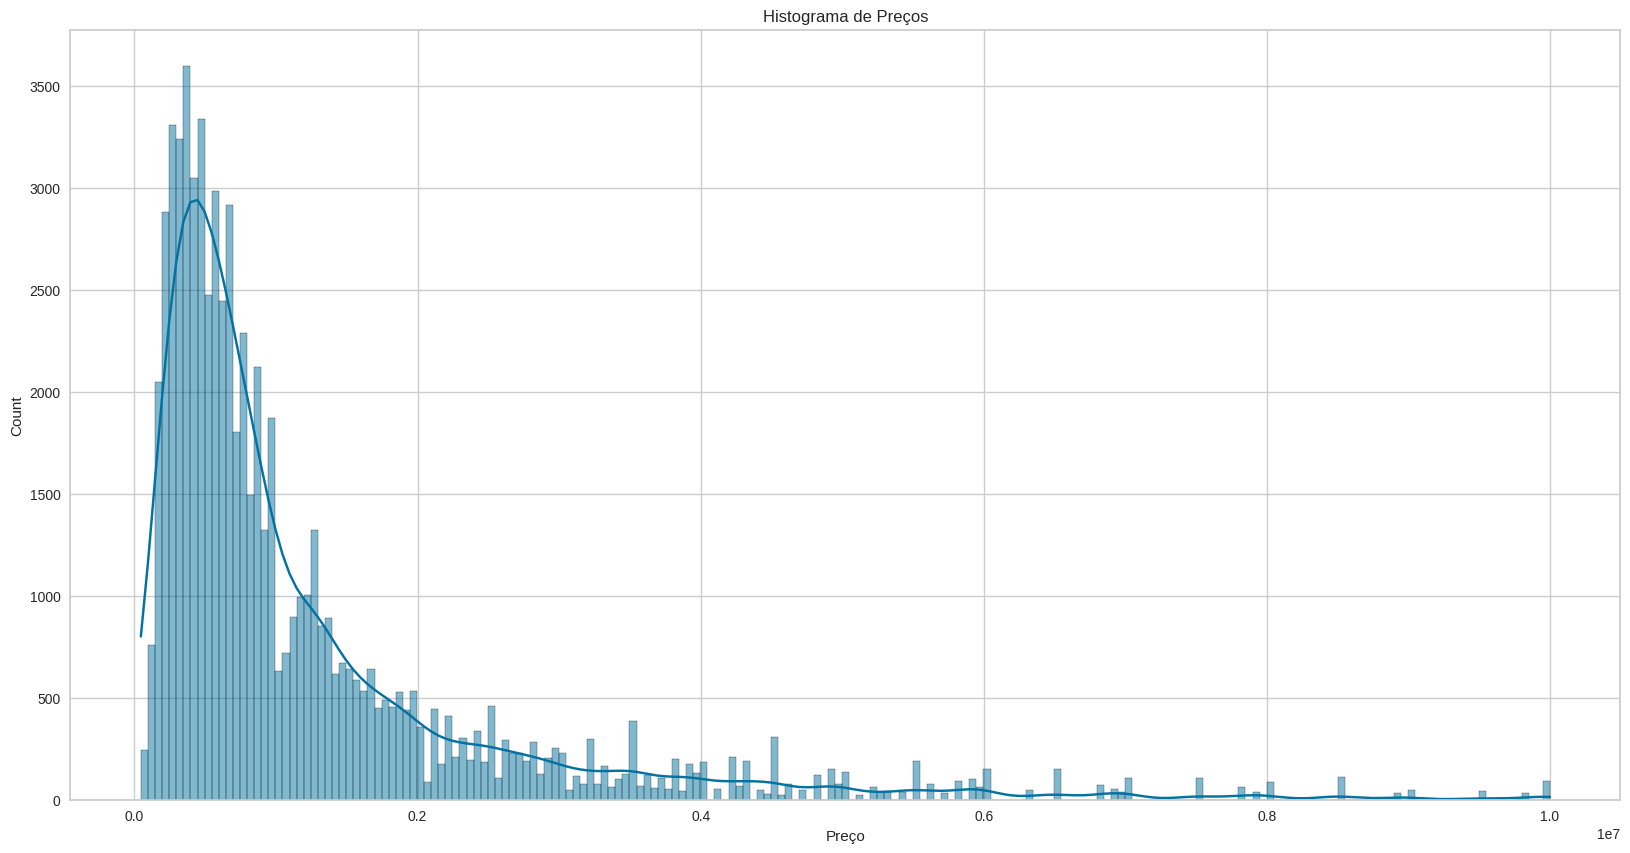

In [270]:
ax = sns.histplot(data=dados_imoveis,x='price',kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title("Histograma de Preços")
ax.set_xlabel('Preço')

### Transformação das variáveis

Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:


$$log1p = log(1+x)$$


Lembrar de realizar a transformação inversa para obter o valor original:


$$expm1 = exp(x) - 1$$




* Para mais detalhes consultar as documentações [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) e [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



In [271]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate = True)
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [272]:
colunas_dados_tranformados = dados_imoveis.select_dtypes(exclude=['object']).columns
df_transformado = pd.concat([dados_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


<ipython-input-273-ee26fbcee8ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(df_transformado.corr(),mask=mask, cmap = cores, annot = True, fmt=".3f",linewidths=.6)


<Axes: >

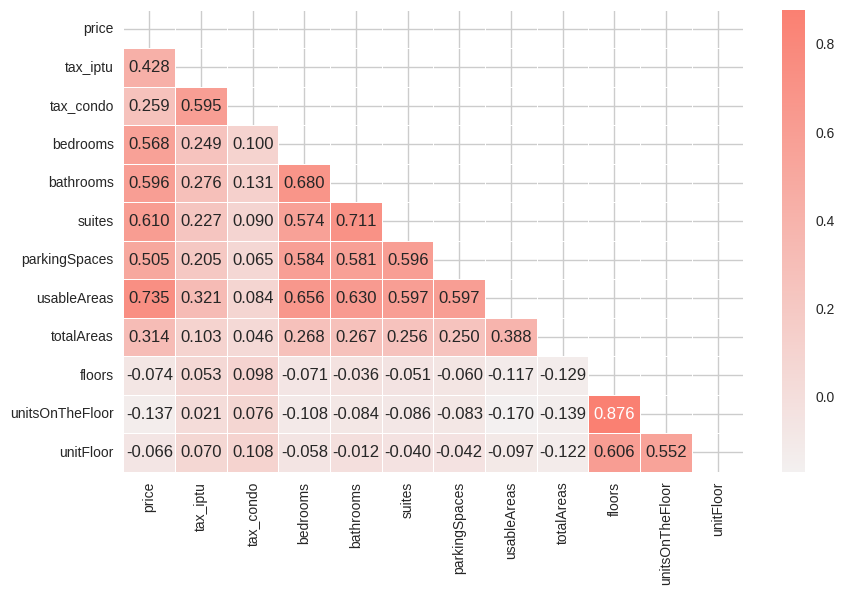

In [273]:
plt.figure(figsize=(10, 6))
plot = sns.heatmap(df_transformado.corr(),mask=mask, cmap = cores, annot = True, fmt=".3f",linewidths=.6)
plot

Text(0.5, 0, 'Preço')

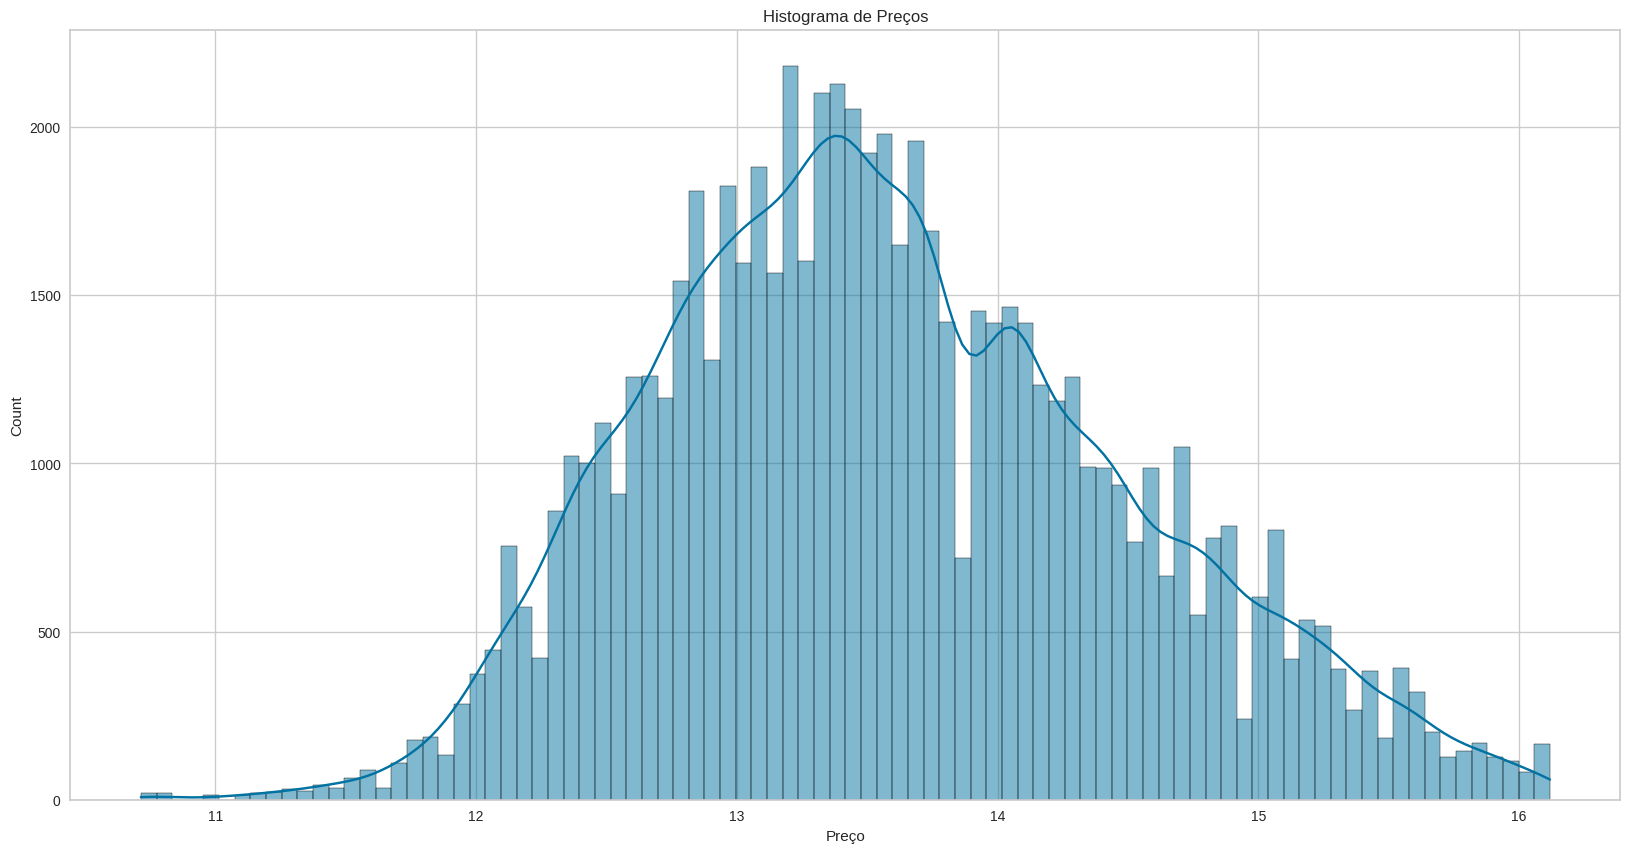

In [274]:
ax = sns.histplot(data=df_transformado,x='price',kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title("Histograma de Preços")
ax.set_xlabel('Preço')

### Dummies

In [275]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns
variaveis_categoricas

Index(['unit', 'zone'], dtype='object')

In [276]:
#vai transformar os dados categóricos em novas colunas com 0 e 1
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


In [277]:
#concatenando as novas colunas no dataset principal
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0


## 2.2 - Regressão Linear

* "A análise de regressão diz respeito ao estudo da dependência de uma variável, a variável dependente, em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio (da população) da primeira em termos dos valores conhecidos ou fixados (em amostragens repetidas) das segundas."

* [Documentação Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

* Regressão Simples: a variável dependente (regressando ou `y`) se relaciona a uma única variável explanatória (regressor ou `X`).

* Regressão Múltipla: a variável dependente (regressando ou `y`) se relaciona a mais de uma única variável explanatória (regressor ou `Xi`).


[slides]

## 2.3 - Ajuste e Previsão

### Divisão dos dados

In [278]:
X = dados_imoveis_dummies.drop('price',axis=1)
y = dados_imoveis_dummies['price']

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Modelo

In [281]:
from sklearn.linear_model import LinearRegression

In [282]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [283]:
y_previsto = modelo.predict(X_test)

In [284]:
y_previsto

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [285]:
#trazer de volta o que transformamos em log
np.expm1(y_previsto)

array([ 572448.75390184,  257055.99942511,  406312.22560668, ...,
        504644.12051738,  248648.05260577, 1973821.0052161 ])

## 2.4 - Métrica de desempenho

### Coeficiente de Determinação

* descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
* r2 situa-se entre 0 e 1
* "r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."





In [286]:
from sklearn.metrics import r2_score

In [287]:
print('R²={}'.format(r2_score(y_test,y_previsto).round(3)))

R²=0.788


In [288]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error
print('MAE={}'.format(mae(y_test,y_previsto).round(3)))

MAE=0.312


In [289]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
print('MSE={}'.format(mse(y_test,y_previsto).round(3)))

MSE=0.174


### Extra

* [Documentação Sklearn - Métricas para Regressão](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

* Observação: Estas métricas dependem da escala dos dados!!!

* MSE (Mean Squared Error ou Erro Quadrático Médio): média da diferença **elevada ao quadrado** entre o valor real e o previsto. *(penalidade sobre o erro)*

* MAE (Mean Absolute Error ou Erro Absoluto Médio): média da diferença **absoluta** (módulo) entre o valor real e o previsto.


# Aula 3 - Árvore de Decisão para Regressão






## 3.1 - Árvore de Decisão Classificação versus Regressão

[slides]

[Biblioteca Sklearn - Desicion Tree](https://scikit-learn.org/stable/modules/tree.html#regression)

**Dica de leitura**: [Capítulo 6 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9), [Para saber mais: como funciona a árvore de decisão? - Classificação](https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107966)



## 3.2 - Implementando o Modelo


In [290]:
from sklearn.tree import DecisionTreeRegressor

In [291]:
modeloDT = DecisionTreeRegressor(random_state=42,max_depth=5)

In [292]:
modeloDT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [293]:
y_previsto = modeloDT.predict(X_test)

In [294]:
y_previsto

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Gráfico de erro de predição**: Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos. Em um modelo perfeito, esses pontos estariam alinhados em 45 grau.


Para saber mais sobre outras visualizações:
[**Documentação YellowBrick**](https://www.scikit-yb.org/en/latest/)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


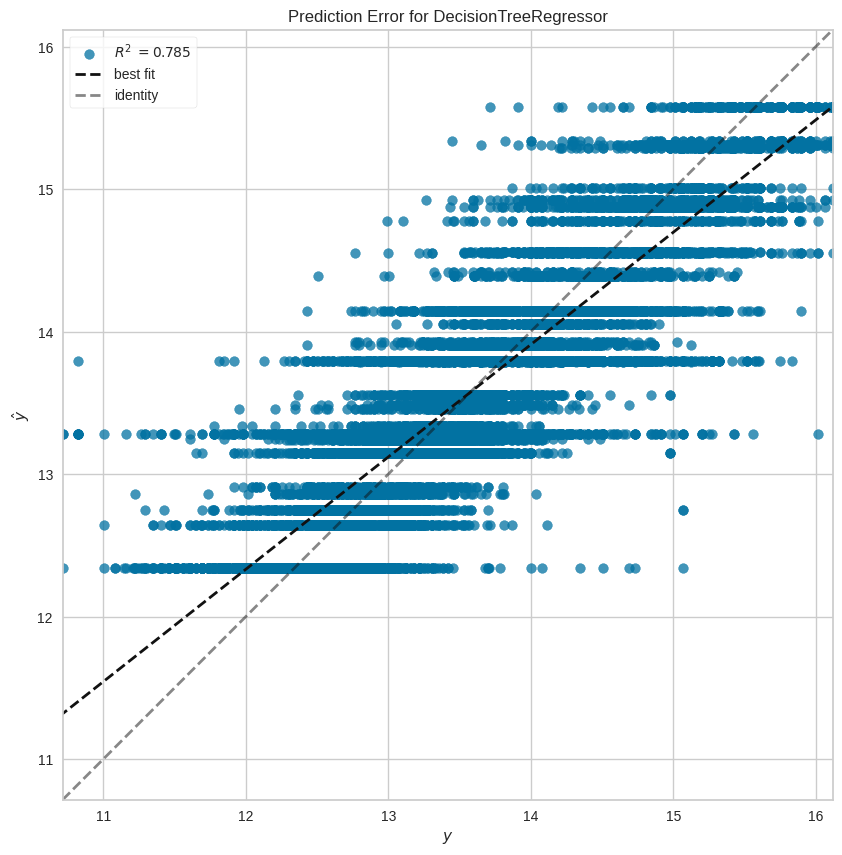

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [295]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(modeloDT)
pev.fit(X_train,y_train)
pev.score(X_test,y_test)
pev.poof()

## 3.3 - Métrica

In [296]:
print('R²={}'.format(r2_score(y_test,y_previsto).round(3)))

R²=0.785


In [297]:
mse = mean_squared_error
print('MSE={}'.format(mse(y_test,y_previsto).round(3)))

MSE=0.176


# Aula 4 - Random Forest para Regressão


## 4.1 - Modelo Ensemble

[slides]

[Biblioteca Sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

**Dica de leitura**: [Artigo Científico - Random Forests](https://link.springer.com/article/10.1023/A:1010933404324), [Wikipédia: Random Forests](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,class%20selected%20by%20most%20trees.), [Capítulo 4 - Livro Introduction to Statistical and Machine Learning Methods for Data Science](https://www.amazon.com.br/dp/B09C2DVZHR/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1), [Capítulo 7 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9)

## 4.2 - Previsão

**Ponto de Atenção**
Os parâmetros são praticamente os mesmos entre o `DecisionTreeRegressor()` e o `RandomForestRegressor()`, com exceção de:

* `n_estimators`: quantidade de árvores na floresta
* `bootstrap`: define se será utilizado o método estatístico de amostragem *bootstrap*
* `oob_score`: define se será utilizado o método de amostragem *out-of-bag* para mensurar os erros da predição
* `n_jobs`: número de *jobs* rodando paralelamente (computação paralela - processadores)
* `warm_start`: faz a adequação de uma nova floresta ou usa uma floresta existente.
* `max_samples`: para o caso do `bootstrap` ser `True`, define o número de amostras a serem extraídas de X para treinar cada árvore base.

In [298]:
from sklearn.ensemble import RandomForestRegressor

In [299]:
modeloRF = RandomForestRegressor(random_state=42,max_depth=5,n_estimators=10)

In [300]:
modeloRF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [301]:
y_previsto = modeloRF.predict(X_test)

**Gráfico de erro de predição**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


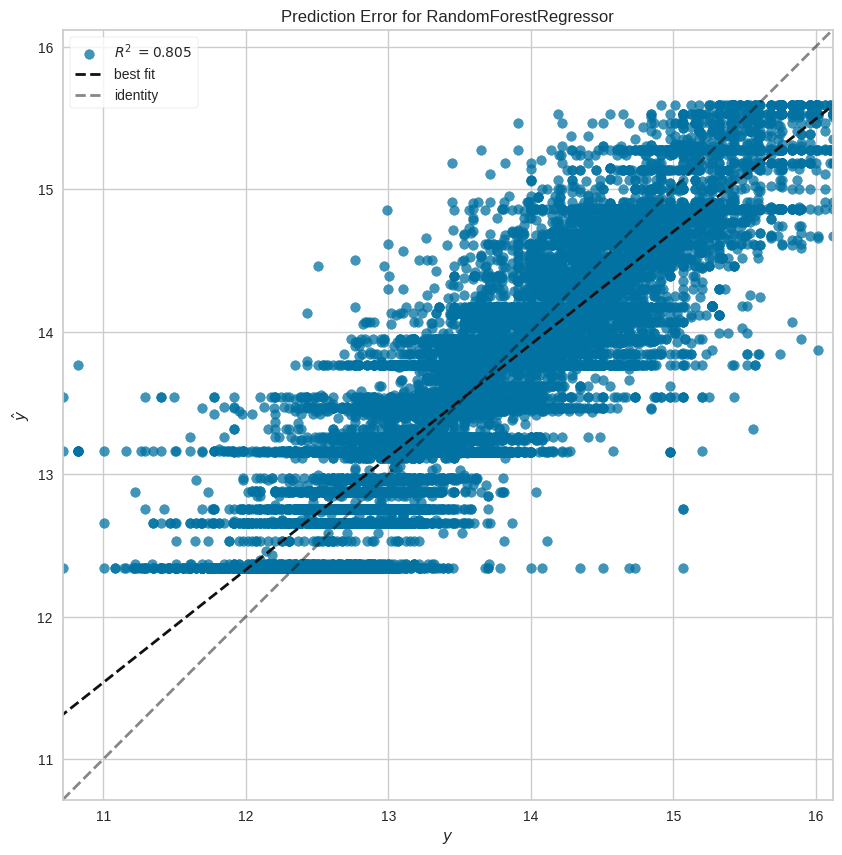

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [302]:
fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(modeloRF)
pev.fit(X_train,y_train)
pev.score(X_test,y_test)
pev.poof()

## 4.3 - Métrica de desempenho

In [303]:
print('R²={}'.format(r2_score(y_test,y_previsto).round(3)))

R²=0.805


In [304]:
mse = mean_squared_error
print('MSE={}'.format(mse(y_test,y_previsto).round(3)))

MSE=0.159


# Aula 5 - Técnicas de Otimização


## 5.1 - Ferramentas de Otimização

* Por que otimizar?

* Quais ferramentas temos?

[Melhorando os hiperparâmetros - Documentação Sklearn](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)

### 1. Cross Validation (Validação Cruzada)

* [Documentação Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

* **Cross Validation** é uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina. Ele consiste em particionar os dados em subconjuntos (partes), onde um subconjunto é utilizado para treino e outro subconjunto é utilizado para teste e avaliação do desempenho do modelo.

* Os dados particionados são os de treino (70% dos dados originais)!

* **K-fold**: conjunto de treino é dividido de forma aleatória em K subconjuntos de aproximadamente mesmo tamanho, depois são realizados K iterações, onde K-1 subconjuntos são para treino e 1 para validação.

* O desempenho calculado pela validação cruzada k-fold é a média de todos os valores calculados em cada iteração.


### 2. Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)

* [Documentação Randomized Search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

* [Artigo Científico sobre Random Search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

* "Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio."

* Imagem no artigo sobre funcionamento desta busca



## 5.2 - Otimizando a árvore de decisão

In [305]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5,shuffle=True)

### Cross validation
A técnica cross validation (validação cruzada) funciona dividindo o conjunto de treino em pedaços denominados folds (dobras), em que uma dobra será utilizada para testar o modelo e as outras para treinar o modelo. Esse processo é repetido até que cada dobra tenha sido utilizada para realizar o teste uma única vez.

In [306]:
from sklearn.model_selection import cross_val_score

In [307]:
cross_val_r2 = cross_val_score(
    estimator = modeloDT,
    X = X_train,
    y = y_train,
    scoring = 'r2',
    cv = cv
)
print('R²={}'.format(cross_val_r2.mean().round(3)))

R²=0.781


### Random Search Validação

In [308]:
param_random_dt = {
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : [6,8,10,12,14,16],
    'min_samples_leaf' : [6,8,10],
    'min_samples_split' : [8,10,12,14,16],
    'max_features' : ['sqrt','log2','auto']
}

In [309]:
from sklearn.model_selection import RandomizedSearchCV

In [310]:
random_cv_dt = RandomizedSearchCV(
    modeloDT,
    param_random_dt,
    n_iter = 5,
    cv = cv,
    scoring = 'r2',
    n_jobs = -1
)

In [311]:
random_cv_DT = random_cv_dt.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [312]:
pd.DataFrame(random_cv_DT.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071056,0.005003,0.005486,0.000586,12,10,log2,8,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.797894,0.792728,0.782936,0.787565,0.788294,0.789883,0.005068,4
1,83.514078,0.660995,0.006786,0.003387,14,10,auto,8,absolute_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.835443,0.840694,0.841233,0.837576,0.836160,0.838221,0.002348,2
2,0.122747,0.028165,0.010552,0.005766,8,10,sqrt,8,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.797894,0.792728,0.782936,0.787565,0.788294,0.789883,0.005068,4
3,0.401990,0.047490,0.008807,0.004090,16,8,auto,10,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.851691,0.862034,0.854488,0.858396,0.853491,0.856020,0.003723,1
4,24.152836,0.843902,0.005274,0.000305,16,10,log2,10,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.818199,0.814859,0.822465,0.819553,0.813626,0.817740,0.003195,3


In [313]:
random_cv_DT.best_params_

{'min_samples_split': 16,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'squared_error'}

In [314]:
random_cv_DT.best_score_

0.8560198750368659

### Random Search Teste

In [315]:
DT_otimizado = DecisionTreeRegressor(criterion = 'squared_error',max_features= 'auto',
 max_depth= 12,min_samples_split= 8,
 min_samples_leaf= 8)

In [316]:
DT_otimizado.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=12, max_features='auto', min_samples_leaf=8,
                      min_samples_split=8)

In [342]:
y_previsto_otimizado = DT_otimizado.predict(X_test)

In [343]:
print('R²={}'.format(r2_score(y_test,y_previsto_otimizado).round(3)))

R²=0.863


## 5.3 - Otimizando a Random Forest

### Cross validation

In [324]:
RF_cross_val_r2 = cross_val_score(
    estimator = modeloRF,
    X = X_train,
    y = y_train,
    scoring = 'r2',
    cv = cv
)
print('R²={}'.format(RF_cross_val_r2.mean().round(3)))

R²=0.799


### Random Search Validação

Definindo os parâmetros

In [325]:
param_random_RF = {
    'n_estimators' : [150,200],
    'max_depth' : [20,30],
    'min_samples_split' : [8,10],
    'min_samples_leaf' : [3]
}

In [326]:
random_cv_rf = RandomizedSearchCV(
    modeloRF,
    param_random_RF,
    n_iter = 5,
    cv = cv,
    scoring = 'r2',
    n_jobs = -1,
    random_state = 42
)

In [327]:
random_cv_RF = random_cv_rf.fit(X_train,y_train)

In [328]:
pd.DataFrame(random_cv_RF.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,53.780157,2.114221,0.770744,0.201236,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.897798,0.893515,0.895398,0.897432,0.891236,0.895076,0.002459,2
1,54.881085,1.977167,0.667092,0.105486,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.897950,0.893522,0.895339,0.897387,0.891330,0.895106,0.002454,1
2,39.972273,1.069537,0.519921,0.126426,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.897640,0.893417,0.895268,0.897345,0.890986,0.894931,0.002495,3
3,52.417693,0.788482,0.767603,0.225821,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.897655,0.893134,0.895087,0.897012,0.891002,0.894778,0.002463,4
4,38.880446,4.768149,0.460253,0.123882,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.897304,0.892977,0.894934,0.896990,0.890697,0.894580,0.002490,5


In [329]:
random_cv_RF.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [330]:
random_cv_RF.best_score_

0.8951055265703449

### Random Search Teste

In [332]:
RF_otimizado = RandomForestRegressor(n_estimators = 200,
 max_depth= 30,min_samples_split= 8,
 min_samples_leaf= 3,random_state=42)

In [333]:
RF_otimizado.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [337]:
y_previsto_otimizadoRF = RF_otimizado.predict(X_test)

In [340]:
print('R²={}'.format(r2_score(y_test,y_previsto_otimizadoRF).round(3)))

R²=0.895


## 5.4 - Escolhendo o melhor modelo

In [344]:
#tabela de resultados
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" % r2_score(y_test, y_previsto_otimizado))
print("Floresta Aleatória: %f" % r2_score(y_test, y_previsto_otimizadoRF))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Árvore de Decisão: %f" % round(cross_val_r2.mean(), 3))
print("Floresta Aleatória: %f" % round(RF_cross_val_r2.mean(), 3))



Random Search
Árvore de Decisão: 0.862685
Floresta Aleatória: 0.895045
******************************
Cross Validation
Árvore de Decisão: 0.781000
Floresta Aleatória: 0.799000


In [345]:


#Testando o melhor modelo
cliente_joana = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente_joana



,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [347]:


#Verificando resultados
predicao_cliente_joana = RF_otimizado.predict(cliente_joana)
np.expm1(predicao_cliente_joana)



array([284216.62604224])